In [1]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [3]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [5]:
#hyper parameters
    #Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
    # numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nSamples = 20000

input_size = 38
num_classes = 12

hidden_size = 100
num_epochs = 1000
batch_size = 256
learning_rate = 0.001

num_splits = 2

nTest = 0.2

class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
                'Up by elevator',  'Down by elevator'] 

In [6]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = data
df = df[0:nSamples]

In [7]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 20000
[5475, 1204, 2342, 2068, 1445, 332, 368, 4003, 0, 1537, 1226, 0]


<BarContainer object of 12 artists>

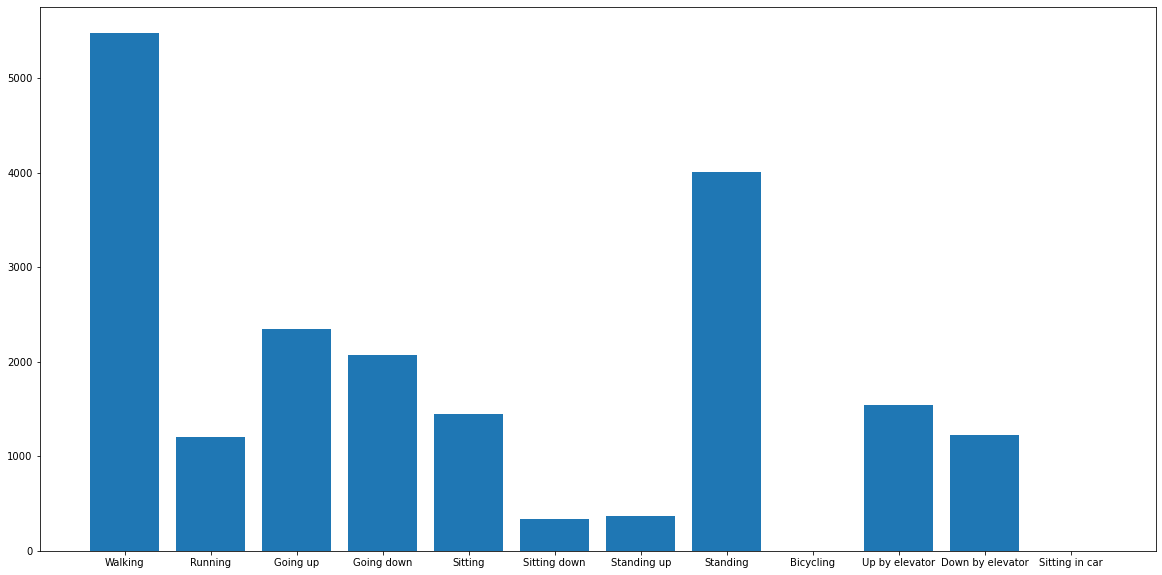

In [8]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [9]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [11]:
# modelo_pre_train = torch.jit.load('modelo_final_2021-06-05_0.8053_Test.zip')
# evaluate_aux(modelo_pre_train, test_loader)
modelo_pre_train = None

######### Launch with 5000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 100 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.480520784854889  loss test >>>>> 1.82776132106781
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1347870826721191  loss test >>>>> 1.567418481707573
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9649491086602211  loss test >>>>> 1.4087884655594827
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8593403100967407  loss test >>>>> 1.2999888179823755
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7837735339999199  loss test >>>>> 1.21930958583951
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7271738722920418  loss test >>>>> 1.1567357349395753
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6839430406689644  loss test >>>>> 1.1068659734513078
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6497344002127647  loss test >>>>> 1.0663775330223144
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6214832365512848  loss test >>>>> 1.0329352960321638
Epochs >>>>>> 500/1000  

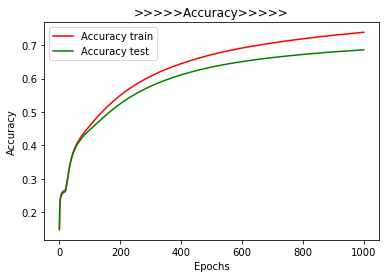

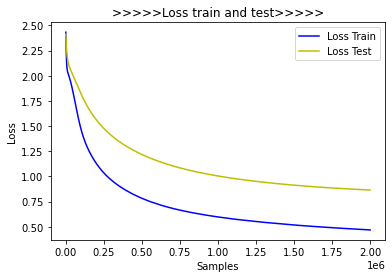

Accuracy de validación con kFold 0.7415489783653846
Accuracy Train: 0.78275 
Accuracy Test: 0.741 
Diferencia entre train y test: 0.041749999999999954

 


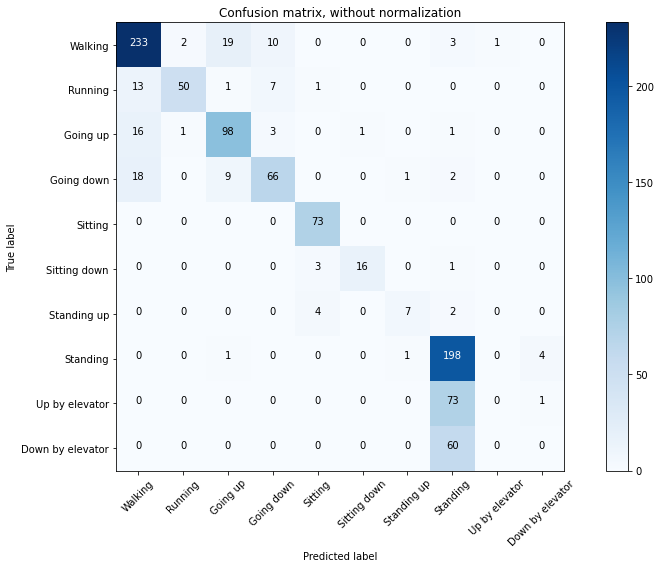

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.43272165954113  loss test >>>>> 1.795320440530777
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1186476796865463  loss test >>>>> 1.5344627256691457
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9604909718036652  loss test >>>>> 1.3837269395589828
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8543348237872124  loss test >>>>> 1.2814762615039945
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7792090103030205  loss test >>>>> 1.2067208544909953
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7236041575670242  loss test >>>>> 1.1496366705993812
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6808269768953323  loss test >>>>> 1.1046437206864357
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6472786962985992  loss test >>>>> 1.068265440929681
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6198929324746132  loss test >>>>> 1.0382893916302258
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.5970659032464027  loss test >>>>> 1.0132020802944899
Epochs >>>>>> 550/1000  Loss train 

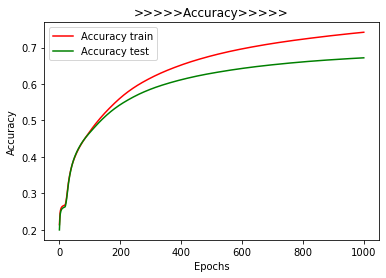

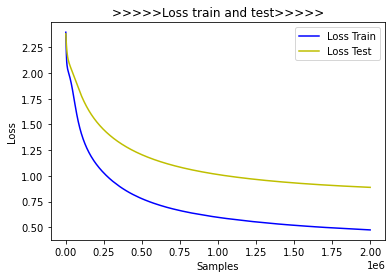

Accuracy de validación con kFold 0.7286470853365384
Accuracy Train: 0.77 
Accuracy Test: 0.739 
Diferencia entre train y test: 0.031000000000000028

 


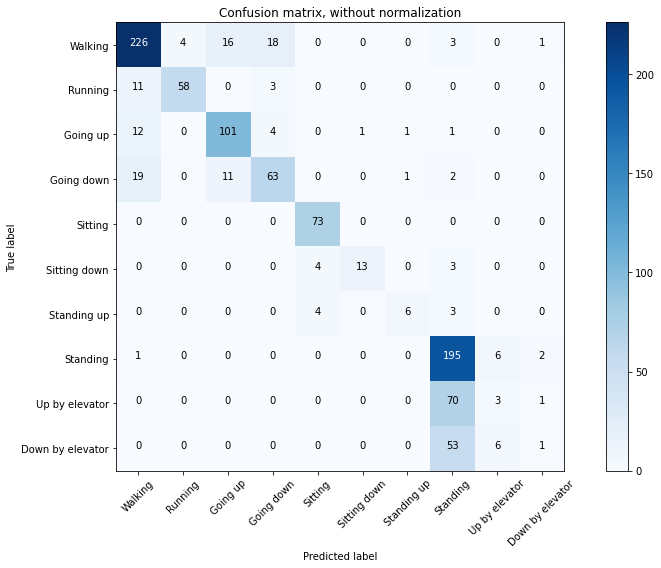

######### Launch with 5000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 200 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.4489582926034927  loss test >>>>> 1.8245234721899033
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1174276322126389  loss test >>>>> 1.5527579255402089
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9560266882181168  loss test >>>>> 1.3952563361823558
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8454990535974503  loss test >>>>> 1.287498528957367
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.768296405673027  loss test >>>>> 1.2072789084911346
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7129368931055069  loss test >>>>> 1.1451898255944253
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.671069398522377  loss test >>>>> 1.0958477576502732
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6376650407910347  loss test >>>>> 1.0557757010683417
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.610562227666378  loss test >>>>> 1.0226571007238494
Epochs >>>>>> 500/1000

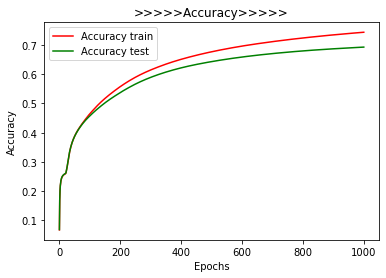

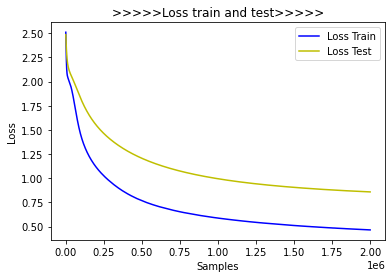

Accuracy de validación con kFold 0.7454552283653846
Accuracy Train: 0.7855 
Accuracy Test: 0.741 
Diferencia entre train y test: 0.044499999999999984

 


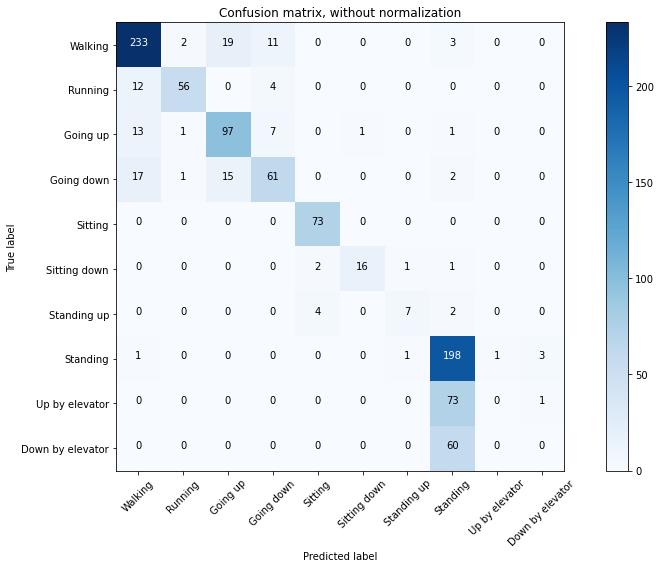

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.465611919760704  loss test >>>>> 1.8231779360771179
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1532796323299408  loss test >>>>> 1.5675031486153603
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9883813560009003  loss test >>>>> 1.4132357336084047
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8805137723684311  loss test >>>>> 1.3074641562625766
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.8067153617739677  loss test >>>>> 1.2298622699379922
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7525065839290619  loss test >>>>> 1.1701757966478665
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.7098290622234344  loss test >>>>> 1.1226188889784472
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6748255267739296  loss test >>>>> 1.0836312377639115
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6452596336603165  loss test >>>>> 1.0510202203359869
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.6191812455654144  loss test >>>>> 1.0232532552182674
Epochs >>>>>> 550/1000  Loss tra

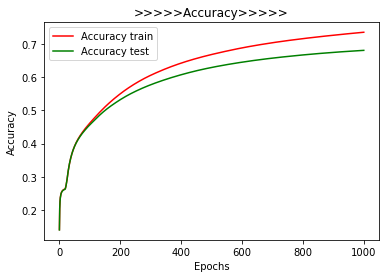

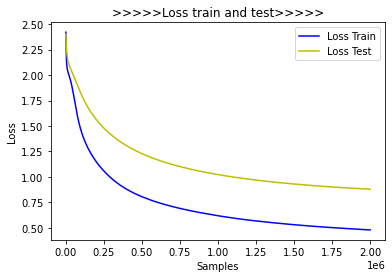

Accuracy de validación con kFold 0.7401216947115384
Accuracy Train: 0.77725 
Accuracy Test: 0.745 
Diferencia entre train y test: 0.03225

 


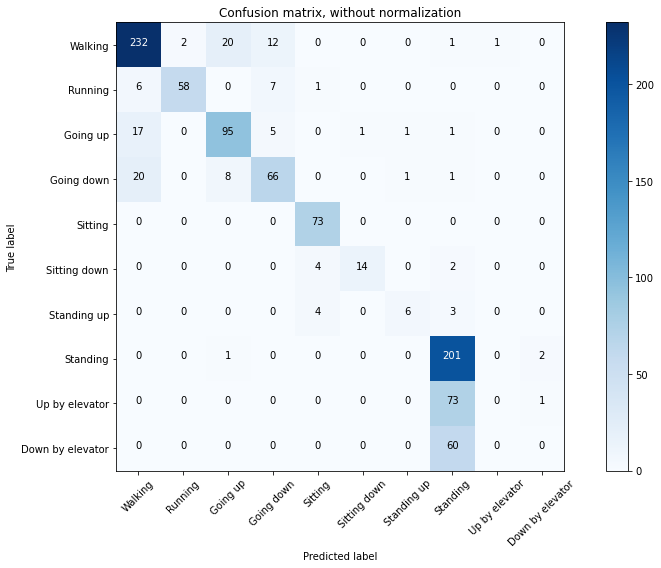

######### Launch with 5000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 300 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.427756130695343  loss test >>>>> 1.8144069764018058
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.107437014579773  loss test >>>>> 1.5559406460821628
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9490463212132454  loss test >>>>> 1.4053388769427935
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8472597822546959  loss test >>>>> 1.3027353270351887
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.77562615275383  loss test >>>>> 1.227347299784422
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7223832607269287  loss test >>>>> 1.1695525840669871
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6808981820940971  loss test >>>>> 1.1238004751290593
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6465896368026733  loss test >>>>> 1.0865611135959625
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6177413687109947  loss test >>>>> 1.055548012289736
Epochs >>>>>> 500/1000  

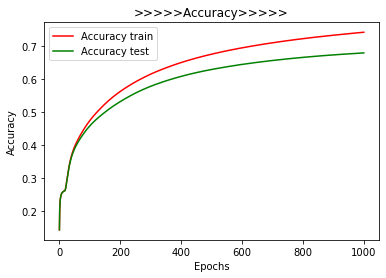

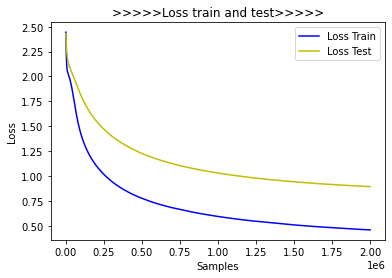

Accuracy de validación con kFold 0.7375676081730769
Accuracy Train: 0.7835 
Accuracy Test: 0.742 
Diferencia entre train y test: 0.04149999999999998

 


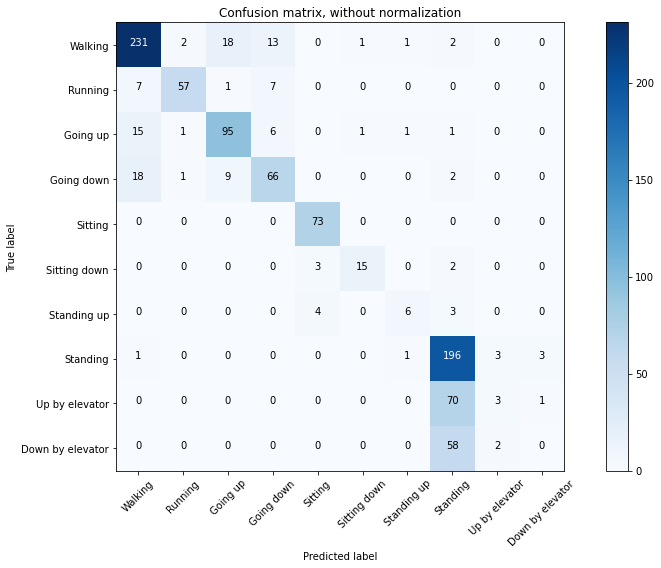

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.4321346282958984  loss test >>>>> 1.7937931349873544
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1294460147619247  loss test >>>>> 1.5326509736478329
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9802508428692818  loss test >>>>> 1.3807952132821084
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8829995468258858  loss test >>>>> 1.2780312624201178
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.812935434281826  loss test >>>>> 1.2021168351471425
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.759889617562294  loss test >>>>> 1.1431126127640405
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.7180716171860695  loss test >>>>> 1.0957017787013734
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6840836554765701  loss test >>>>> 1.0567828892171383
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.655185878276825  loss test >>>>> 1.0242987764875093
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.6302507072687149  loss test >>>>> 0.9967504973858595
Epochs >>>>>> 550/1000  Loss train

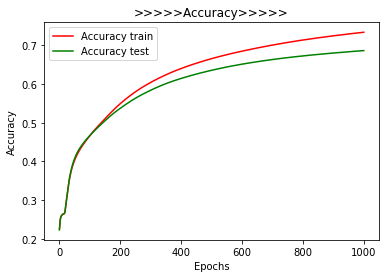

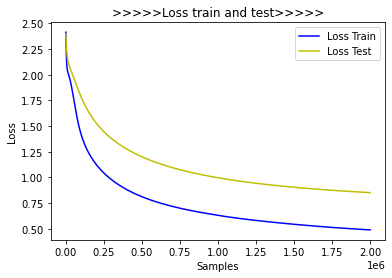

Accuracy de validación con kFold 0.7420935997596154
Accuracy Train: 0.78375 
Accuracy Test: 0.753 
Diferencia entre train y test: 0.030749999999999944

 


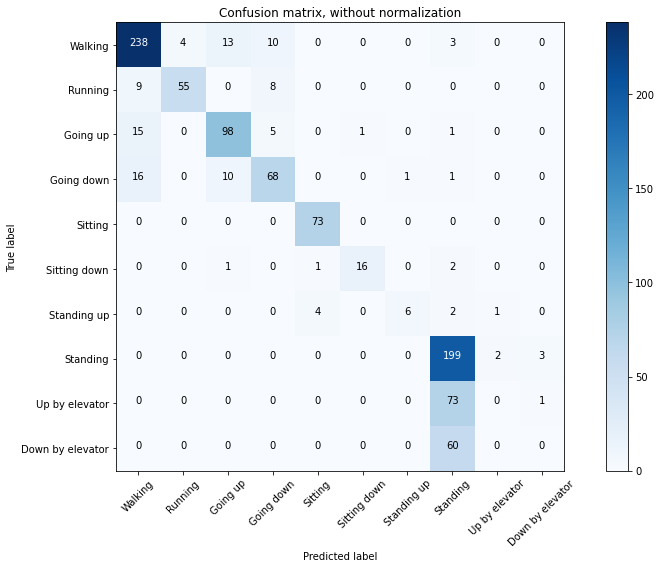

######### Launch with 5000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 400 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.440030962228775  loss test >>>>> 1.8066237637400626
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1244059354066849  loss test >>>>> 1.540450830757618
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9689429402351379  loss test >>>>> 1.3850233291089535
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8663043156266212  loss test >>>>> 1.2805123725533485
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7909741550683975  loss test >>>>> 1.20401524451375
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7325976118445396  loss test >>>>> 1.1449414093792438
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6858924776315689  loss test >>>>> 1.0977466566009182
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6480585932731628  loss test >>>>> 1.059139316752553
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6173260286450386  loss test >>>>> 1.0270432775550418
Epochs >>>>>> 500/1000 

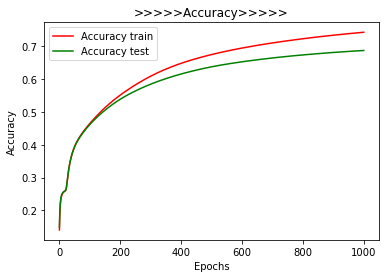

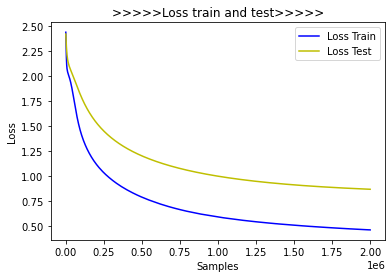

Accuracy de validación con kFold 0.7423377403846154
Accuracy Train: 0.7845 
Accuracy Test: 0.736 
Diferencia entre train y test: 0.04849999999999999

 


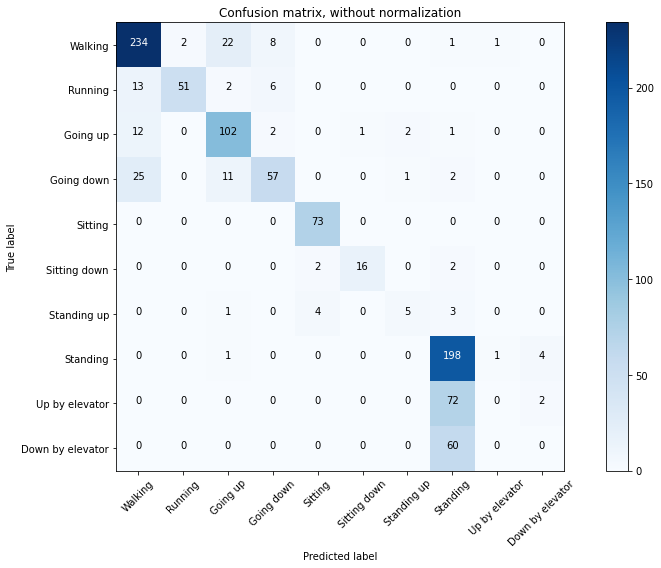

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.4535783678293228  loss test >>>>> 1.8012440192699433
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1379614621400833  loss test >>>>> 1.5466271080076694
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9741957485675812  loss test >>>>> 1.3938086686034998
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8636600598692894  loss test >>>>> 1.2886883611232043
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7837504968047142  loss test >>>>> 1.21068223837018
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7236017137765884  loss test >>>>> 1.1499957709511122
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.678661473095417  loss test >>>>> 1.1014836212354047
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6438814476132393  loss test >>>>> 1.0619257680885494
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6158898621797562  loss test >>>>> 1.0291396143204636
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.5925548523664474  loss test >>>>> 1.001580288618803
Epochs >>>>>> 550/1000  Loss train 

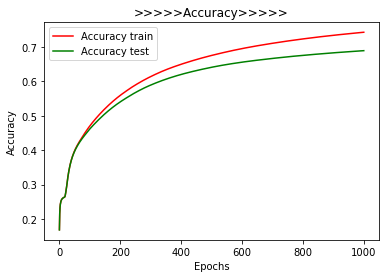

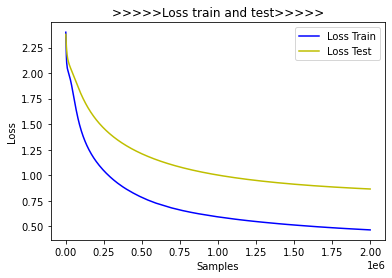

Accuracy de validación con kFold 0.7449481670673077
Accuracy Train: 0.78675 
Accuracy Test: 0.742 
Diferencia entre train y test: 0.044749999999999956

 


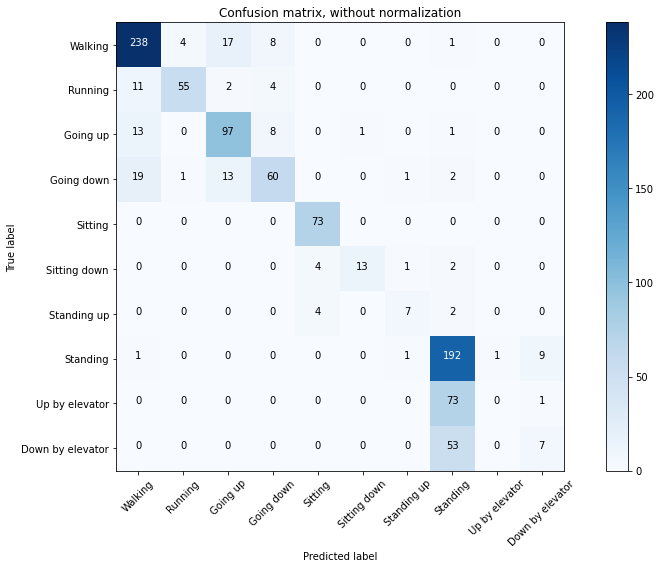

######### Launch with 5000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 500 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.4426757097244263  loss test >>>>> 1.7990084359049796
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1472705453634262  loss test >>>>> 1.5488344405591488
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.9909292608499527  loss test >>>>> 1.398829999367396
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8890138417482376  loss test >>>>> 1.2957411135733128
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.8166842013597488  loss test >>>>> 1.219858681589365
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7611978873610497  loss test >>>>> 1.161436453362306
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.7157722637057304  loss test >>>>> 1.114830276795796
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6775671541690826  loss test >>>>> 1.0765553521178663
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6452548652887344  loss test >>>>> 1.0444643360541928
Epochs >>>>>> 500/1000

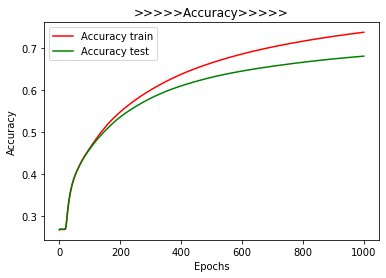

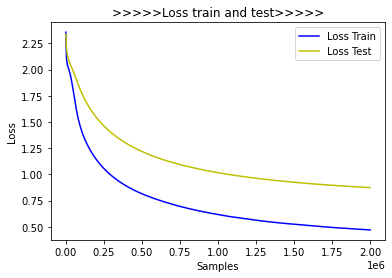

Accuracy de validación con kFold 0.7397836538461539
Accuracy Train: 0.78375 
Accuracy Test: 0.739 
Diferencia entre train y test: 0.044749999999999956

 


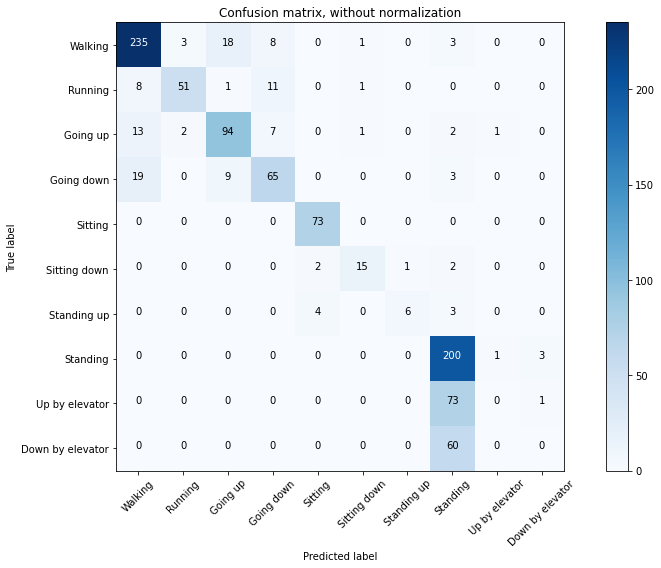

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.4803747534751892  loss test >>>>> 1.8289183604717254
Epochs >>>>>> 100/1000  Loss train >>>>>> 1.1670128554105759  loss test >>>>> 1.5741549108922481
Epochs >>>>>> 150/1000  Loss train >>>>>> 1.0054609328508377  loss test >>>>> 1.4221122042338052
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.9012259840965271  loss test >>>>> 1.3175507575273513
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.8248830214142799  loss test >>>>> 1.239250310331583
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.7666419148445129  loss test >>>>> 1.177663290252288
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.7214785516262054  loss test >>>>> 1.1279131399946554
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6854172348976135  loss test >>>>> 1.0870172268897296
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6557160764932632  loss test >>>>> 1.0529750899308257
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.6307023391127586  loss test >>>>> 1.0243221267461777
Epochs >>>>>> 550/1000  Loss trai

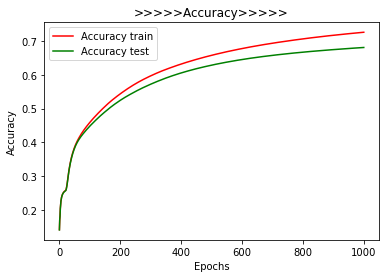

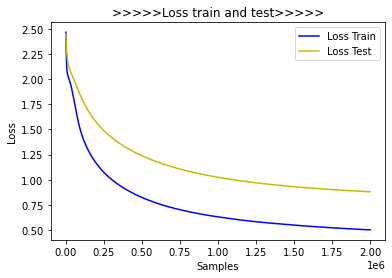

Accuracy de validación con kFold 0.738525390625
Accuracy Train: 0.774 
Accuracy Test: 0.731 
Diferencia entre train y test: 0.04300000000000004

 


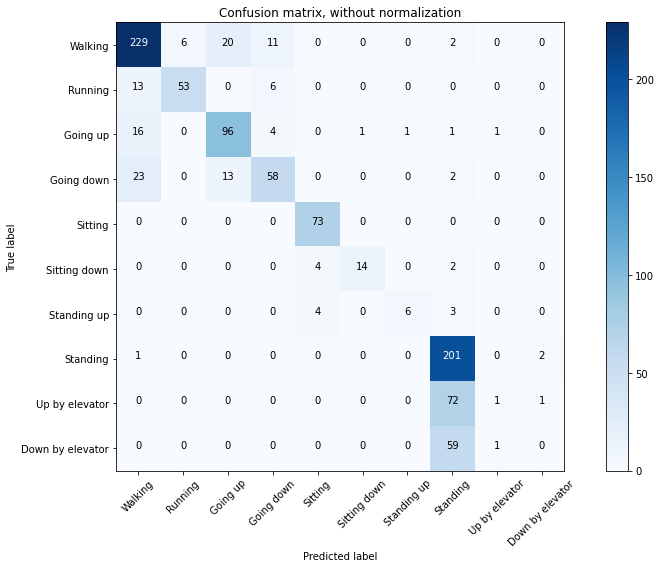

######### Launch with 10000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 100 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1614417359232903  loss test >>>>> 1.5383948583900928
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9300795122981071  loss test >>>>> 1.2964619881659747
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.824346162378788  loss test >>>>> 1.170332824687163
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.756958968937397  loss test >>>>> 1.0893988463655113
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.708164855837822  loss test >>>>> 1.031431504175067
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.671506728976965  loss test >>>>> 0.9872512069220344
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6442070566117764  loss test >>>>> 0.9523272219300271
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6232560127973557  loss test >>>>> 0.9241019990947098
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6058909632265568  loss test >>>>> 0.9008601895057493
Epochs >>>>>> 500/1000 

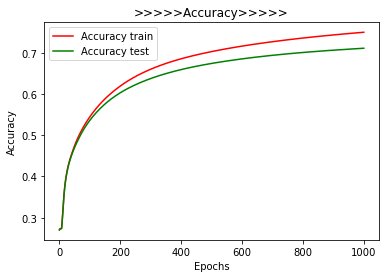

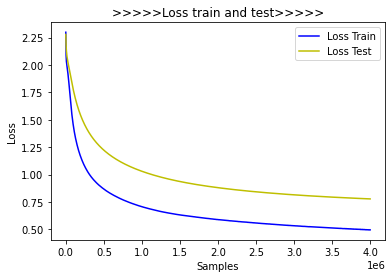

Accuracy de validación con kFold 0.754638671875
Accuracy Train: 0.780625 
Accuracy Test: 0.737 
Diferencia entre train y test: 0.043625000000000025

 


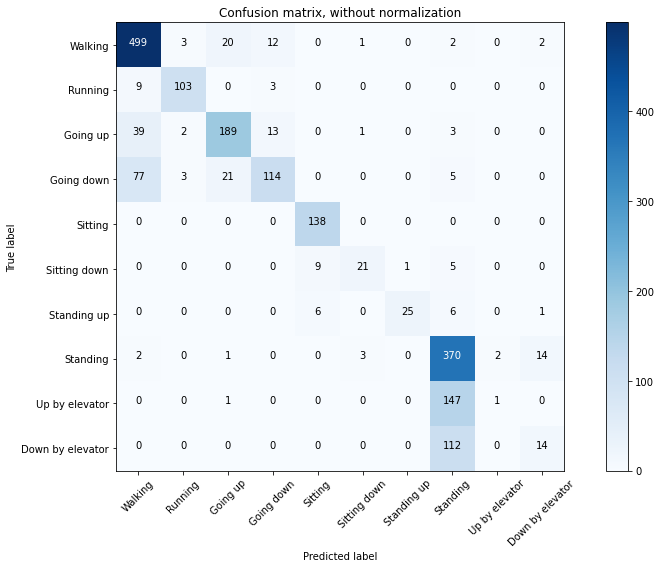

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1959879994392395  loss test >>>>> 1.576018386632204
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9778543226420879  loss test >>>>> 1.3306790329515934
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.87222496047616  loss test >>>>> 1.2018374835451444
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.8021013140678406  loss test >>>>> 1.1178175907954573
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7510761879384518  loss test >>>>> 1.0573226509541274
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.711140152066946  loss test >>>>> 1.011143767448763
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6783551052212715  loss test >>>>> 0.9744486086815596
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6515564732253551  loss test >>>>> 0.9444559817761182
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6286254897713661  loss test >>>>> 0.9194480306655168
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.6097907349467278  loss test >>>>> 0.8982783524021506
Epochs >>>>>> 550/1000  Loss train >

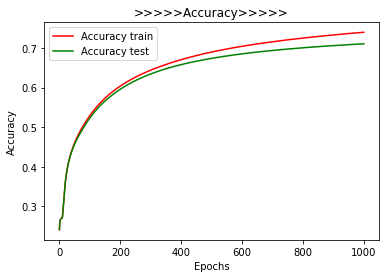

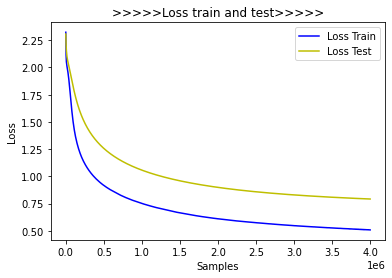

Accuracy de validación con kFold 0.7535400390625
Accuracy Train: 0.776 
Accuracy Test: 0.735 
Diferencia entre train y test: 0.041000000000000036

 


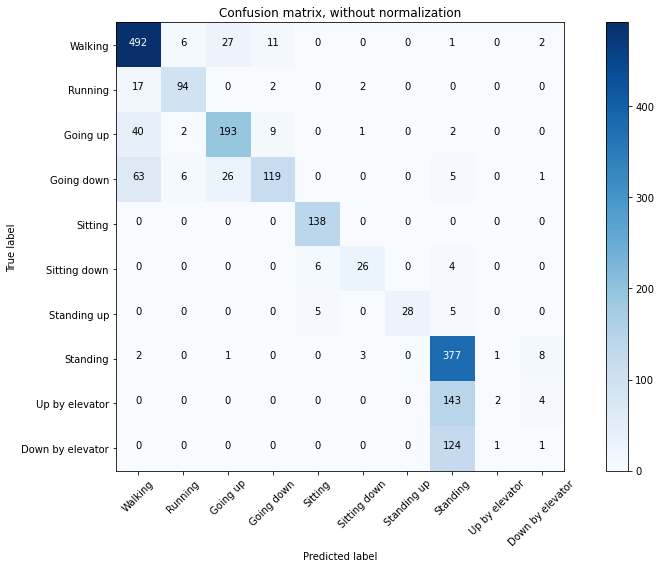

######### Launch with 10000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 200 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.2154875472187996  loss test >>>>> 1.5959133650362491
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9685354977846146  loss test >>>>> 1.3469159081950783
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.8484811410307884  loss test >>>>> 1.212045595794916
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7763076089322567  loss test >>>>> 1.1237199011445045
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7241259999573231  loss test >>>>> 1.059936827853322
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6848035454750061  loss test >>>>> 1.011099618387719
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6530370190739632  loss test >>>>> 0.9724264731577464
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6276878230273724  loss test >>>>> 0.9410714650899172
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6073390021920204  loss test >>>>> 0.9152154018316004
Epochs >>>>>> 500/10

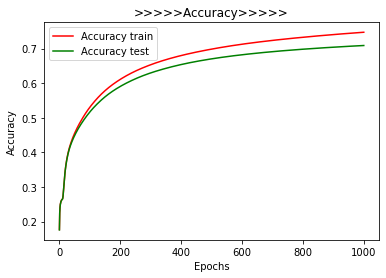

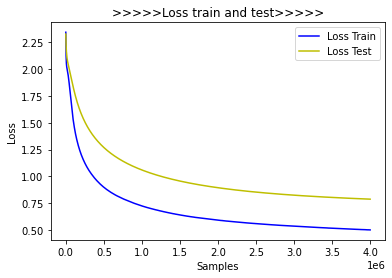

Accuracy de validación con kFold 0.754833984375
Accuracy Train: 0.783 
Accuracy Test: 0.7485 
Diferencia entre train y test: 0.034499999999999975

 


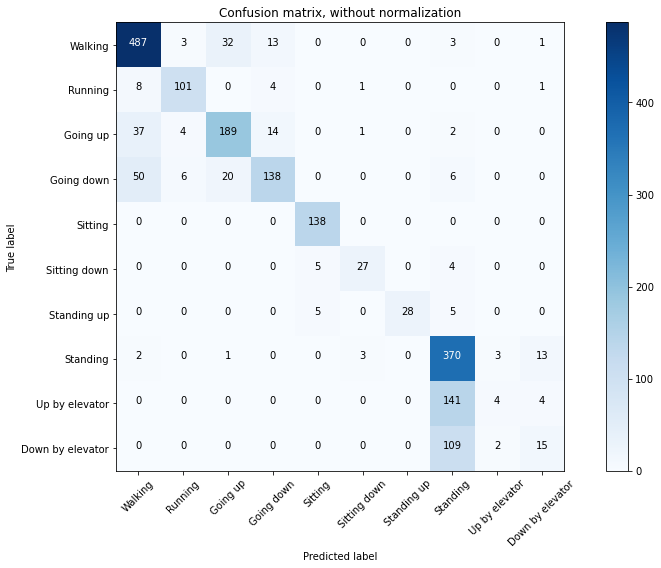

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1504384204745293  loss test >>>>> 1.5376007549464703
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9133755192160606  loss test >>>>> 1.2897806740179658
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.7957517392933369  loss test >>>>> 1.157096102287372
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7255316711962223  loss test >>>>> 1.0715339630655945
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6779916249215603  loss test >>>>> 1.0110837759673594
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6433070786297321  loss test >>>>> 0.9659431313350797
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6153345815837383  loss test >>>>> 0.9307532692062003
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.593323614448309  loss test >>>>> 0.9023925257753581
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.575197022408247  loss test >>>>> 0.879018392852611
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.5591326095163822  loss test >>>>> 0.8593591917380691
Epochs >>>>>> 550/1000  Loss train 

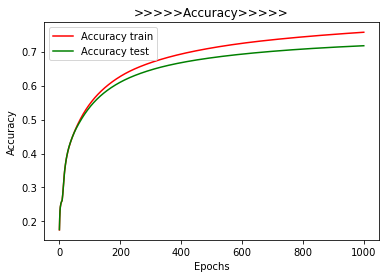

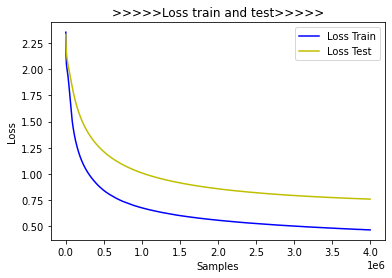

Accuracy de validación con kFold 0.755322265625
Accuracy Train: 0.7855 
Accuracy Test: 0.7435 
Diferencia entre train y test: 0.041999999999999926

 


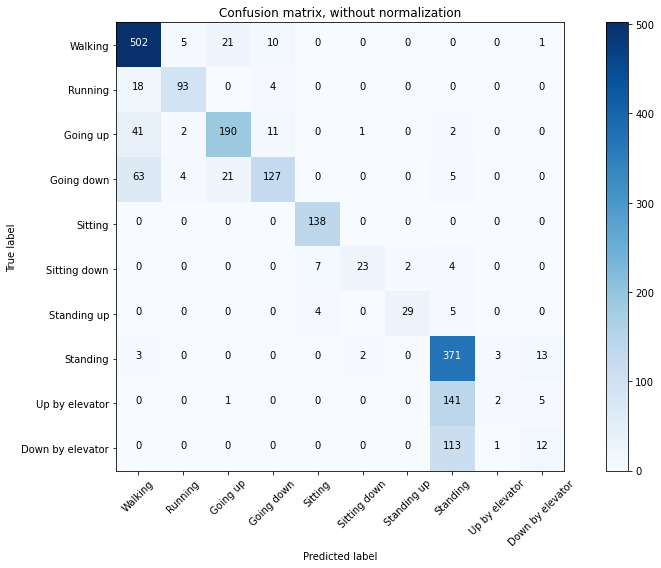

######### Launch with 10000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 300 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1656926274299622  loss test >>>>> 1.5541556036472322
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9344903379678726  loss test >>>>> 1.3063327724486589
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.8118672333657742  loss test >>>>> 1.1721199577550094
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7335837446153164  loss test >>>>> 1.0827994569018484
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6816404424607754  loss test >>>>> 1.0178904790133239
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6458914801478386  loss test >>>>> 0.969009359565874
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6190360710024834  loss test >>>>> 0.9312096325627395
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.5978049896657467  loss test >>>>> 0.9012834241986275
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5798000879585743  loss test >>>>> 0.8770559926579395
Epochs >>>>>> 500/

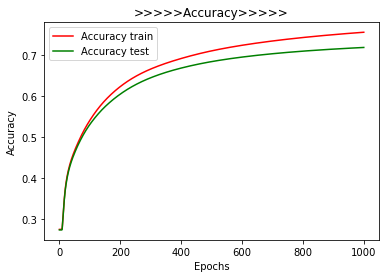

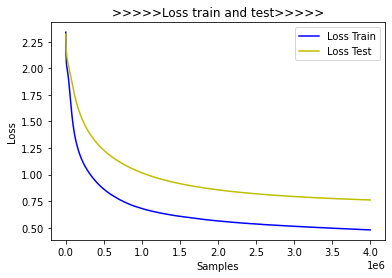

Accuracy de validación con kFold 0.755029296875
Accuracy Train: 0.781375 
Accuracy Test: 0.742 
Diferencia entre train y test: 0.03937500000000005

 


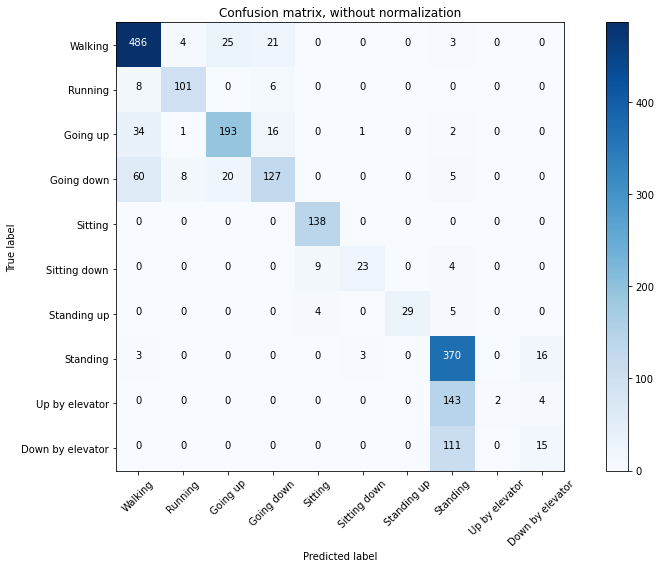

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1890552416443825  loss test >>>>> 1.563782726228237
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.940197441726923  loss test >>>>> 1.3099618742614985
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.8221921175718307  loss test >>>>> 1.1737755208462477
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7519500404596329  loss test >>>>> 1.087146452087909
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7028133645653725  loss test >>>>> 1.026440591081977
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.666373111307621  loss test >>>>> 0.9812185990065336
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6377993896603584  loss test >>>>> 0.9461056807637215
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6145723983645439  loss test >>>>> 0.9179919440951199
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5949103161692619  loss test >>>>> 0.8949906805157661
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.5784890651702881  loss test >>>>> 0.8758351382017135
Epochs >>>>>> 550/1000  Loss train >

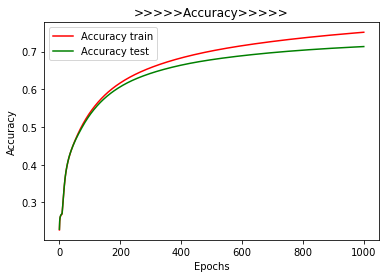

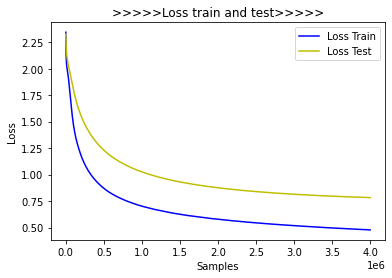

Accuracy de validación con kFold 0.7537109375
Accuracy Train: 0.78275 
Accuracy Test: 0.752 
Diferencia entre train y test: 0.030749999999999944

 


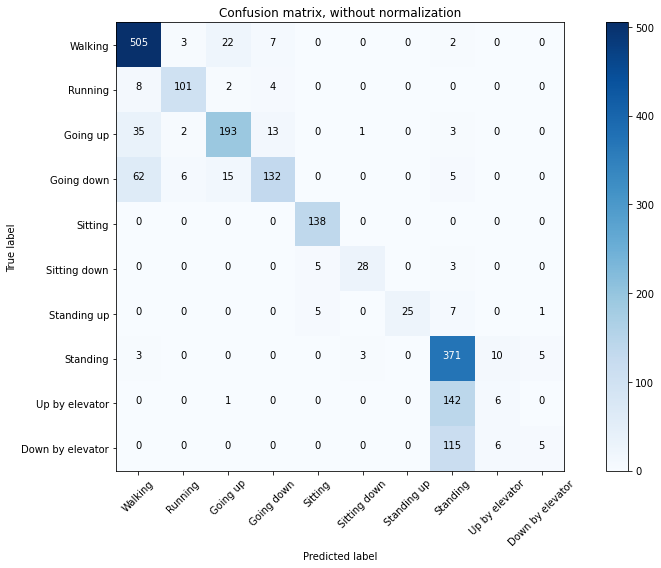

######### Launch with 10000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 400 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1691320165991783  loss test >>>>> 1.5536522497236729
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.940980602055788  loss test >>>>> 1.305187597721815
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.836581539362669  loss test >>>>> 1.1767682454983392
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7723877541720867  loss test >>>>> 1.0941568384505809
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.7261778116226196  loss test >>>>> 1.0351374366879462
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.69000493735075  loss test >>>>> 0.9901964849606156
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6610889472067356  loss test >>>>> 0.9546133862329381
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6376178711652756  loss test >>>>> 0.9255830888357014
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.6177572943270206  loss test >>>>> 0.9014604410943058
Epochs >>>>>> 500/1000

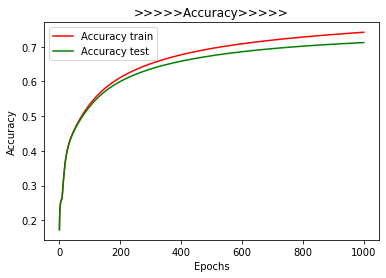

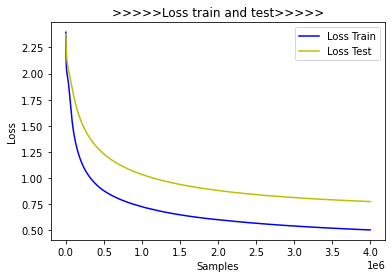

Accuracy de validación con kFold 0.7498046875
Accuracy Train: 0.771625 
Accuracy Test: 0.7265 
Diferencia entre train y test: 0.04512499999999997

 


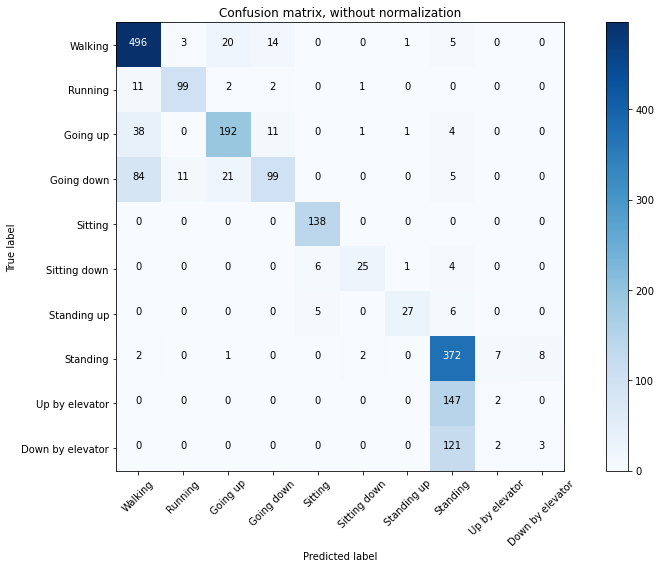

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1413680240511894  loss test >>>>> 1.5353722758591175
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9203662052750587  loss test >>>>> 1.2911332332715393
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.8031208589673042  loss test >>>>> 1.1614674433817467
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7344613745808601  loss test >>>>> 1.0772163870744407
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6893940344452858  loss test >>>>> 1.01746653740108
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6569420881569386  loss test >>>>> 0.9730112619077166
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.631609495729208  loss test >>>>> 0.9387360425612756
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6107652112841606  loss test >>>>> 0.9115278266649693
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5931101609021425  loss test >>>>> 0.8894406030906571
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.5771005246788263  loss test >>>>> 0.8711828717067838
Epochs >>>>>> 550/1000  Loss train

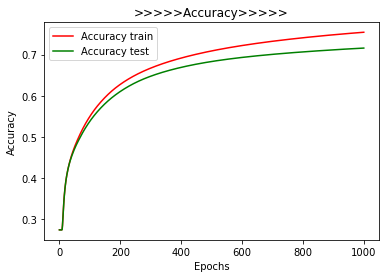

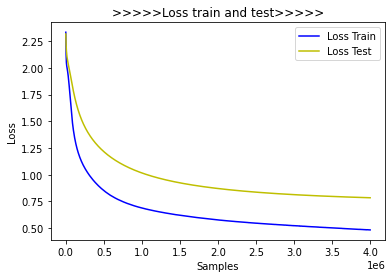

Accuracy de validación con kFold 0.751123046875
Accuracy Train: 0.780625 
Accuracy Test: 0.742 
Diferencia entre train y test: 0.03862500000000002

 


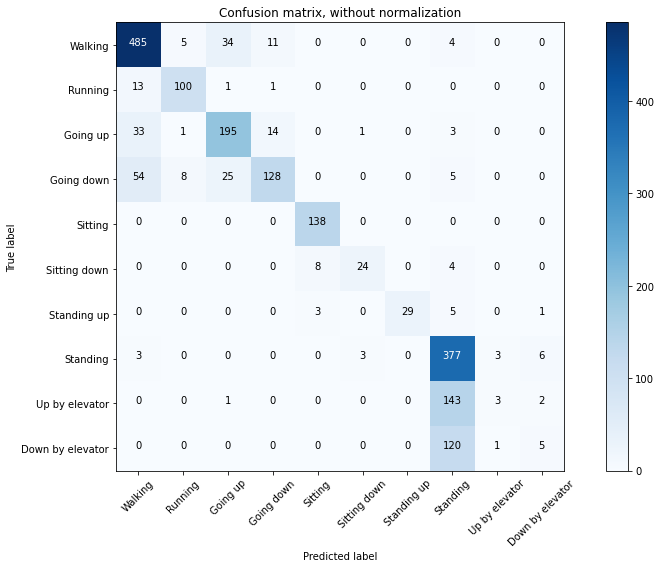

######### Launch with 10000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 500 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1356923431158066  loss test >>>>> 1.5231521886587143
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9080997295677662  loss test >>>>> 1.2705773443356156
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.7970058657228947  loss test >>>>> 1.140224742765228
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7262982204556465  loss test >>>>> 1.0567434925213457
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6802316717803478  loss test >>>>> 0.997640352204442
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6475573442876339  loss test >>>>> 0.9535881963248054
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.622194416821003  loss test >>>>> 0.9193560703737396
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.6021329313516617  loss test >>>>> 0.8919155494496226
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5854810755699873  loss test >>>>> 0.8694645145287117
Epochs >>>>>> 500/10

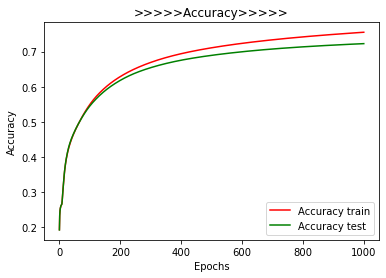

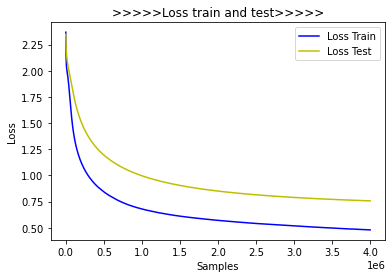

Accuracy de validación con kFold 0.758642578125
Accuracy Train: 0.783375 
Accuracy Test: 0.7305 
Diferencia entre train y test: 0.052875000000000005

 


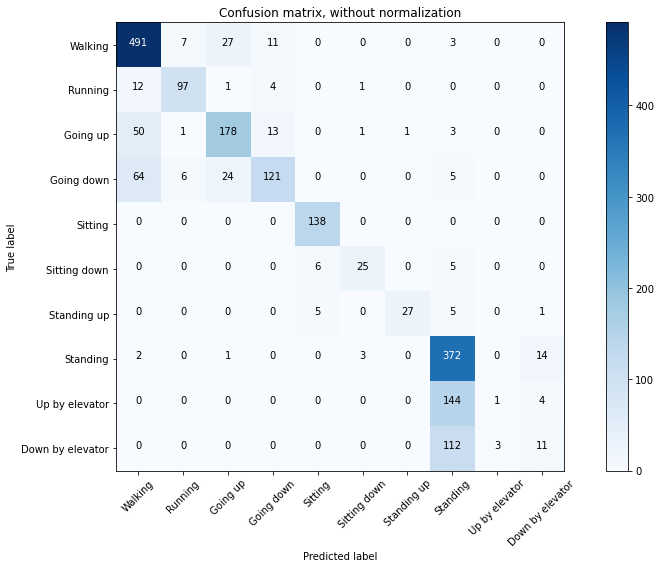

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.1396976634860039  loss test >>>>> 1.5585190771520139
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.9078285172581673  loss test >>>>> 1.3002125969529152
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.7991484515368938  loss test >>>>> 1.1664189202338457
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.7306882664561272  loss test >>>>> 1.0810256378352643
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6825561001896858  loss test >>>>> 1.0208766665756703
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6458983793854713  loss test >>>>> 0.9758748267715176
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6176924630999565  loss test >>>>> 0.9408018153480121
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.5944409407675266  loss test >>>>> 0.912634218595922
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5740042440593243  loss test >>>>> 0.8893998103837172
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.5564823877066374  loss test >>>>> 0.869828685797751
Epochs >>>>>> 550/1000  Loss trai

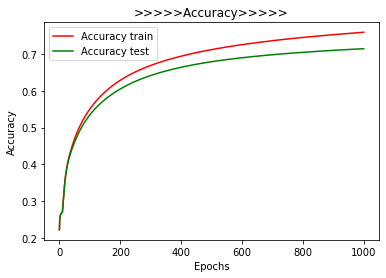

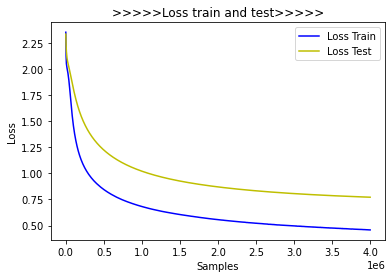

Accuracy de validación con kFold 0.756884765625
Accuracy Train: 0.785125 
Accuracy Test: 0.752 
Diferencia entre train y test: 0.03312499999999996

 


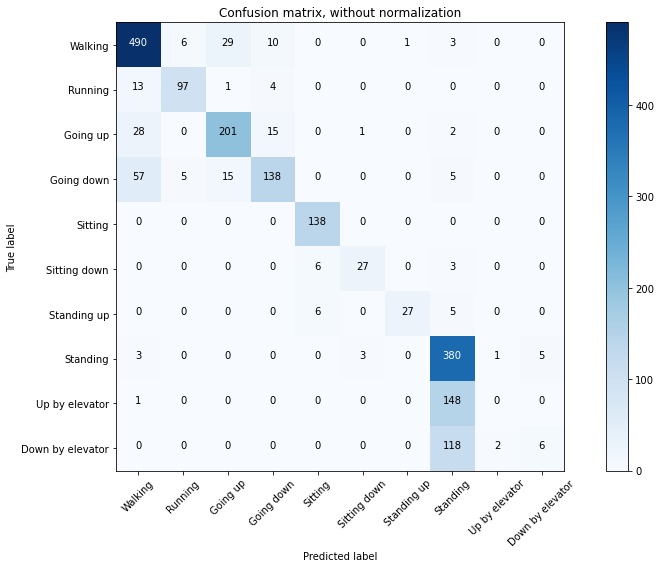

######### Launch with 15000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 100 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.0480184356371562  loss test >>>>> 1.4266997235516707
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.8293432394663492  loss test >>>>> 1.1895434871315955
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.73168316980203  loss test >>>>> 1.0679703415433566
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.6725647275646528  loss test >>>>> 0.991355923563242
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6328730235497156  loss test >>>>> 0.9375634845991929
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.604432021578153  loss test >>>>> 0.8973842428707414
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.5830123275518417  loss test >>>>> 0.8661827035674027
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.5668378844857216  loss test >>>>> 0.8412407838491102
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.552927989512682  loss test >>>>> 0.820861021567274
Epochs >>>>>> 500/1000 

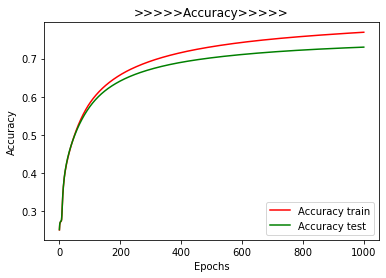

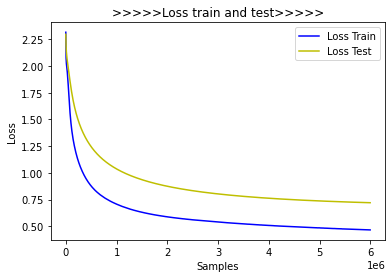

Accuracy de validación con kFold 0.7604631696428571
Accuracy Train: 0.7878333333333334 
Accuracy Test: 0.7653333333333333 
Diferencia entre train y test: 0.022500000000000075

 


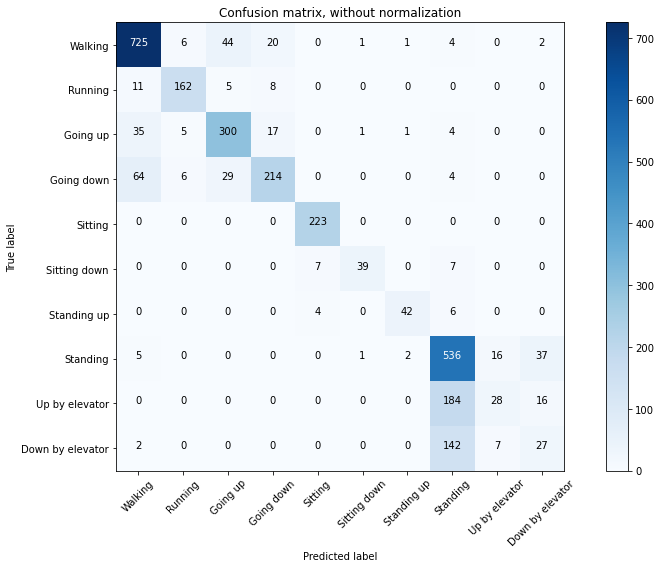

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.0606346676747005  loss test >>>>> 1.4479644022385278
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.8457188432415327  loss test >>>>> 1.2010768470168114
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.7518515065312386  loss test >>>>> 1.0752180497513877
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.6950849890708923  loss test >>>>> 0.9960581184178591
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6553721924622854  loss test >>>>> 0.9408366005023321
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6262885319689909  loss test >>>>> 0.8998492997801966
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.6026619325081507  loss test >>>>> 0.8679901137877079
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.583369892090559  loss test >>>>> 0.8423504503816366
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5671124458312988  loss test >>>>> 0.8212254799957629
Epochs >>>>>> 500/1000  Loss train >>>>>> 0.5529205650091171  loss test >>>>> 0.8035186089674632
Epochs >>>>>> 550/1000  Loss tra

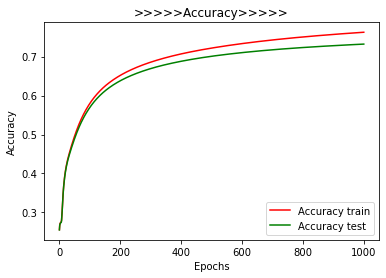

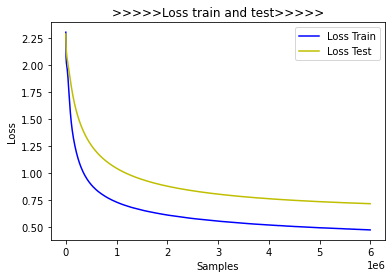

Accuracy de validación con kFold 0.765625
Accuracy Train: 0.7925833333333333 
Accuracy Test: 0.7683333333333333 
Diferencia entre train y test: 0.024249999999999994

 


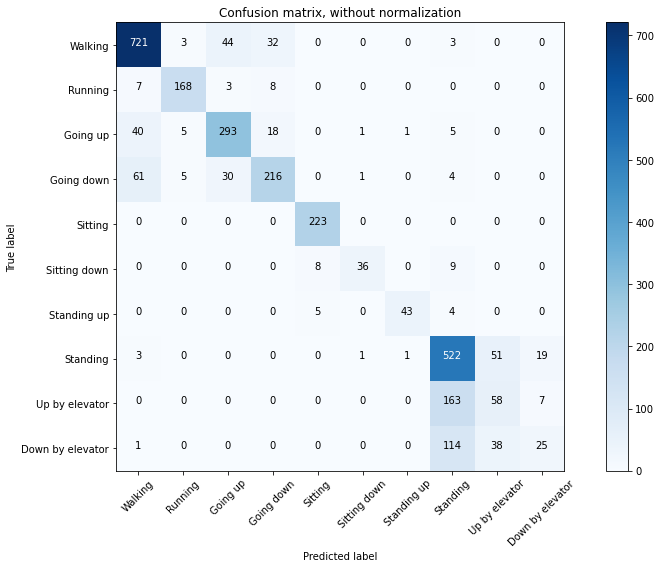

######### Launch with 15000 Samples, 1000 Epochs, 256 Batch, 2 Splits, 12 Class, 200 Hidden neurons ######### 
Epochs >>>>>> 50/1000  Loss train >>>>>> 1.040427101155122  loss test >>>>> 1.4204539812604586
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.8378579591711363  loss test >>>>> 1.1788699578742186
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.7428086151679357  loss test >>>>> 1.0545421453813713
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.6828147123257319  loss test >>>>> 0.9752541249245406
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6410209884246191  loss test >>>>> 0.9193943864007791
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.6104951500892639  loss test >>>>> 0.8777533365372154
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.587665569037199  loss test >>>>> 0.845513221259628
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.5698326875766119  loss test >>>>> 0.8197725719710192
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5546993861595789  loss test >>>>> 0.7987650935351849
Epochs >>>>>> 500/10

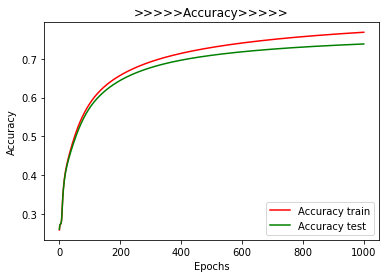

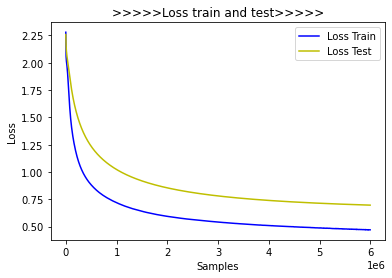

Accuracy de validación con kFold 0.7742745535714285
Accuracy Train: 0.7961666666666667 
Accuracy Test: 0.7713333333333333 
Diferencia entre train y test: 0.024833333333333374

 


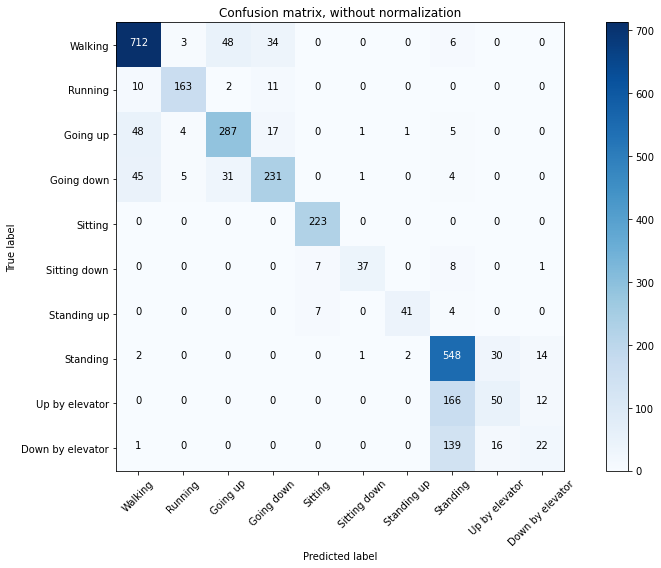

Epochs >>>>>> 50/1000  Loss train >>>>>> 1.0480736245711644  loss test >>>>> 1.428774127860864
Epochs >>>>>> 100/1000  Loss train >>>>>> 0.8199037661155065  loss test >>>>> 1.185566267321507
Epochs >>>>>> 150/1000  Loss train >>>>>> 0.7209311624368032  loss test >>>>> 1.0632266883552075
Epochs >>>>>> 200/1000  Loss train >>>>>> 0.6613197599848112  loss test >>>>> 0.9877452445154389
Epochs >>>>>> 250/1000  Loss train >>>>>> 0.6219302887717882  loss test >>>>> 0.9356766652067502
Epochs >>>>>> 300/1000  Loss train >>>>>> 0.5938983050485452  loss test >>>>> 0.8972770324928893
Epochs >>>>>> 350/1000  Loss train >>>>>> 0.5722864891091982  loss test >>>>> 0.8675615612027191
Epochs >>>>>> 400/1000  Loss train >>>>>> 0.5548108220100403  loss test >>>>> 0.8437248640445372
Epochs >>>>>> 450/1000  Loss train >>>>>> 0.5402627810835838  loss test >>>>> 0.8241861398297328


KeyboardInterrupt: 

In [12]:
for samples in range(5000, nSamples + 1, 5000):
    for neurons in range(100, 500+1, 100):
        
        df = data
        df = df[0:samples]
        
        X = df.drop(['act'], axis = 'columns')
        y = df.act
        
        X_val = X.values
        y_val = y.values
        
        X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)
    
        print(f'\033[1;36m######### Launch with {samples} Samples, {num_epochs} Epochs, {batch_size} Batch, {num_splits} Splits, {num_classes} Class, {neurons} Hidden neurons ######### \033[0;m')
        #  Llamo al metodo que implementa el K-fold
        time_mean, modelo_trained, loss_test_list= Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                                       y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                                       learning_rate, (X_test, y_test), modelo_pre_train)

In [ ]:
# Experimento del numero de neuronas

In [ ]:
# Muestro el tiempo medio del entrenamiento de mi red neuronal 
if(time_mean> 3600):
    print(f'\nTime: {int(time_mean/3600)}h {int((time_mean%3600)/60)}m {round((time_mean%3600)%60)}s')
elif(time_mean> 60):
    print(f'\nTime: {int(time_mean /60)}m {time_mean%60}s')
else:
    print(f'\nTime: {time_mean}')